# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [4]:
import math
import sys

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [6]:
# YOUR CODE HERE

data_url = (
"https://github.com/EpistasisLab/pmlb/raw/master/datasets/"
"wine_quality_red/wine_quality_red.tsv.gz"
)

In [7]:
df = pd.read_csv(data_url, sep="\t", compression="gzip")
df.dropna(inplace=True)
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset shape: (1599, 12)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


In [8]:
df.sample(n=10, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


YOUR ANSWERS HERE

I chose the Wine Quality (Red) dataset. It contains 1,599 rows and 12 columns.
After loading the data, I verified the shape and ensured there were no missing values. The columns represent physicochemical tests (inputs) and a sensory quality score (target).

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [9]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


YOUR ANSWERS HERE

The dataset contains the following 12 columns:

1) fixed acidity: The amount of non-volatile acids (like tartaric acid) in the wine. These don't evaporate easily and contribute to the basic acidic taste.
2) volatile acidity: The amount of acetic acid (vinegar). High levels are considered a defect and lead to an unpleasant vinegar taste.
3) citric acid: Found in small quantities, this acid adds freshness and flavor to the wine.
4) residual sugar: The sugar left over after fermentation stops. It determines how sweet the wine tastes.
5) chlorides: The amount of salt in the wine.
6) free sulfur dioxide: The portion of SO2 that is active and prevents oxidation and microbial growth.
7) total sulfur dioxide: The sum of free and bound SO2. In high concentrations, it becomes evident in the nose and taste.
8) density: The density of the wine (mass/volume), which depends on the alcohol and sugar percentage.
9) pH: A measure of how acidic or basic the wine is. Lower values mean more acidic.
10) sulphates: A wine additive that contributes to sulfur dioxide levels, acting as an antimicrobial and antioxidant.
11) alcohol: The percentage of alcohol content in the wine.
12) target: The output variable. A quality score between 0 and 10 given by human sensory data.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

General EDA - Distribution

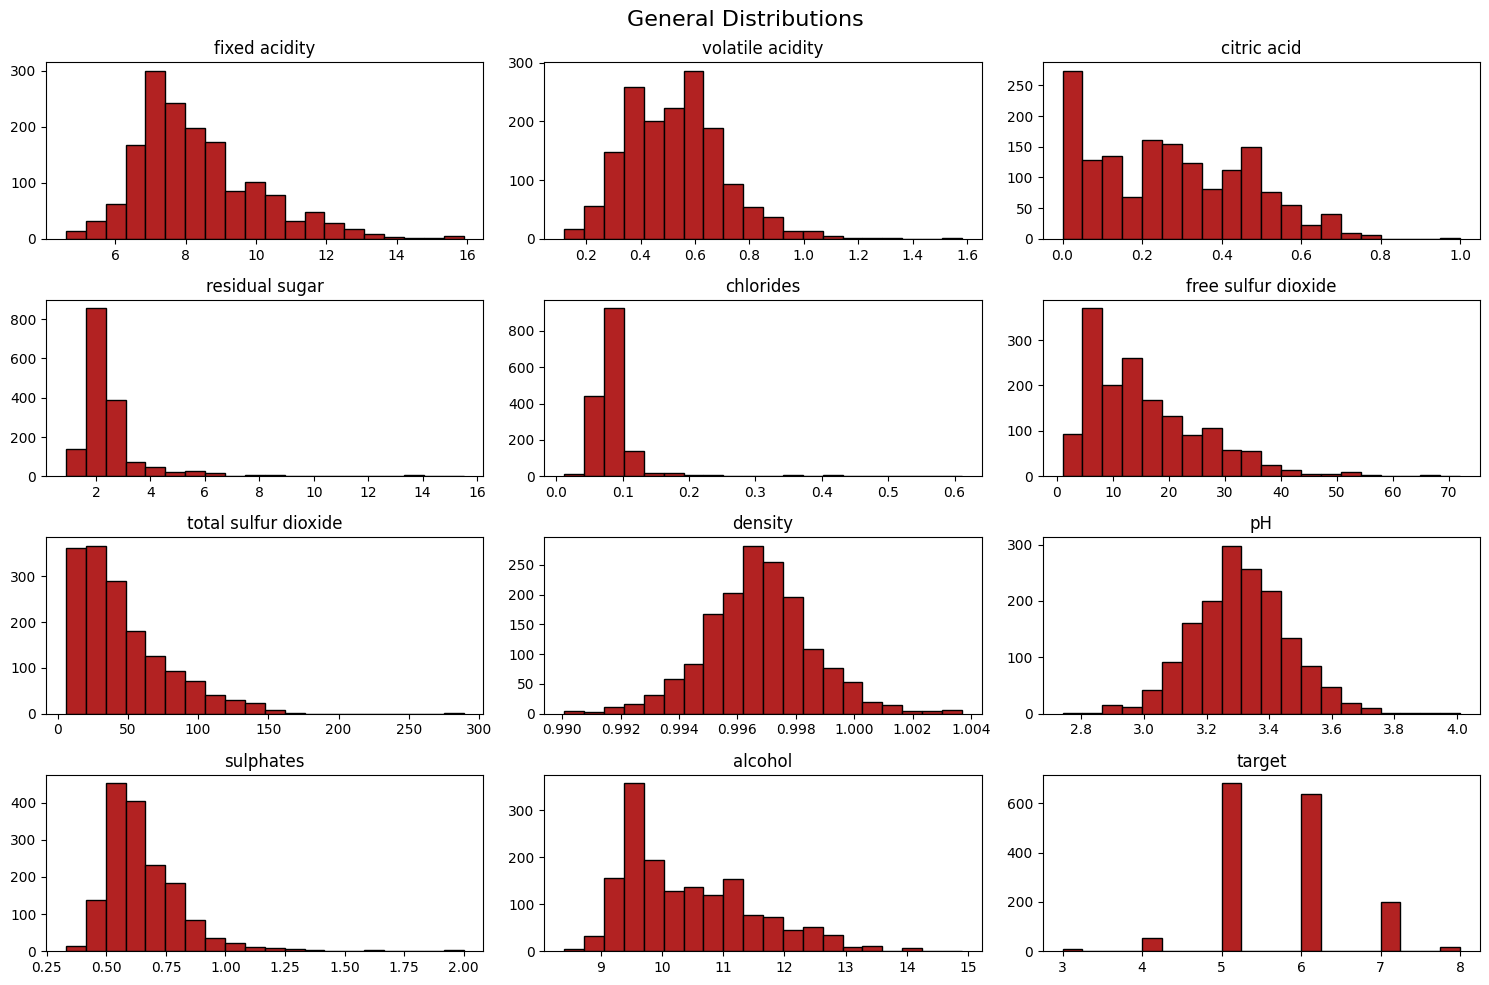

In [10]:
# YOUR CODE HERE

df.hist(bins=20, figsize=(15, 10), color='firebrick', edgecolor='black', grid=False)
plt.suptitle("General Distributions", fontsize=16)
plt.tight_layout()
plt.show()

General EDA - Description

In [11]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Chart 1: Target Distribution

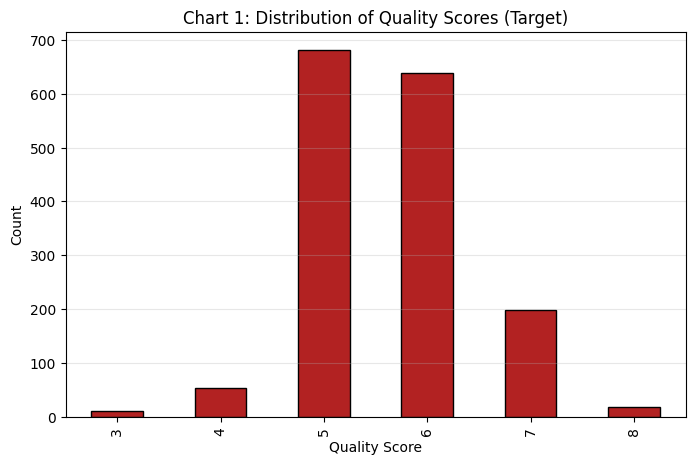

In [12]:
plt.figure(figsize=(8, 5))
counts = df['target'].value_counts().sort_index()
counts.plot(kind='bar', color='firebrick', edgecolor='black')
plt.title("Chart 1: Distribution of Quality Scores (Target)")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()

Chart 2: Alcohol vs Target

<Figure size 800x600 with 0 Axes>

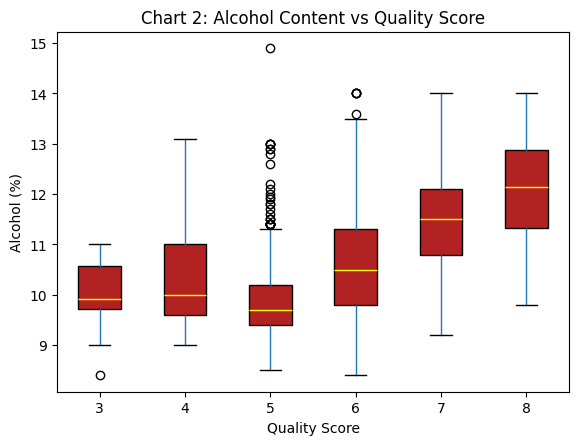

In [13]:
plt.figure(figsize=(8, 6))
df.boxplot(column='alcohol', by='target', grid=False, patch_artist=True,
boxprops=dict(facecolor='firebrick', color='black'),
medianprops=dict(color='yellow'))
plt.title("Chart 2: Alcohol Content vs Quality Score")
plt.suptitle("") # Remove default pandas subtitle
plt.xlabel("Quality Score")
plt.ylabel("Alcohol (%)")
plt.show()

Volatile Acidity vs Target

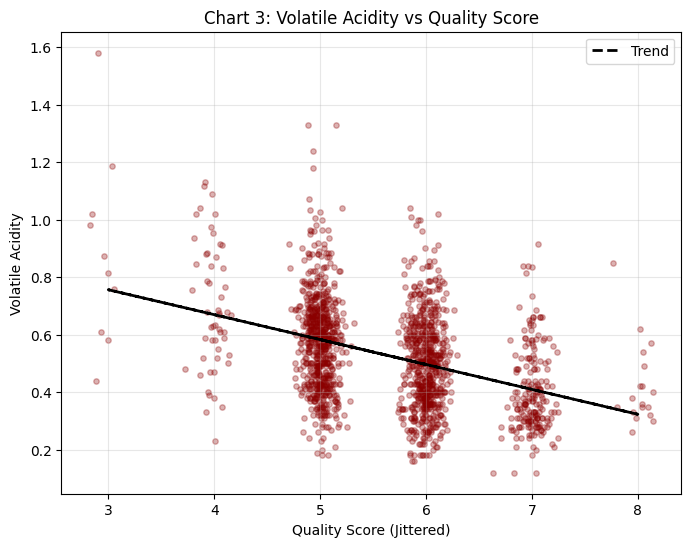

In [14]:
plt.figure(figsize=(8, 6))
rng = np.random.default_rng(42)
jitter = rng.normal(0, 0.1, size=len(df))
plt.scatter(df['target'] + jitter, df['volatile acidity'], alpha=0.3, color='darkred', s=15)
z = np.polyfit(df['target'], df['volatile acidity'], 1)
p = np.poly1d(z)
plt.plot(df['target'], p(df['target']), "k--", linewidth=2, label='Trend')
plt.title("Chart 3: Volatile Acidity vs Quality Score")
plt.xlabel("Quality Score (Jittered)")
plt.ylabel("Volatile Acidity")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

YOUR ANSWERS HERE

Chart 1 Analysis (Target Distribution):
The distribution of the target variable is highly imbalanced and essentially normal (bell-shaped). The vast majority of wines are rated 5 or 6 (average). There are very few "bad" wines (3-4) and very few "excellent" wines (8). This makes it difficult for models to learn the characteristics of the extreme classes because there is very little training data for them.

Chart 2 Analysis (Alcohol vs Quality):
This boxplot shows a clear positive correlation. As the quality score increases (especially from 5 to 8), the median alcohol content also increases significantly. This suggests that alcohol content is likely the strongest single predictor of quality in red wines—higher alcohol is generally associated with higher quality ratings in this dataset.

Chart 3 Analysis (Volatile Acidity vs Quality):
I chose this chart because it shows a distinct negative correlation. Volatile acidity refers to vinegar levels. The plot and trend line clearly show that as volatile acidity decreases, the perceived quality of the wine increases. Wines with high volatile acidity are consistently rated lower (3 or 4), which aligns with the chemical understanding that high acetic acid is a wine fault.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

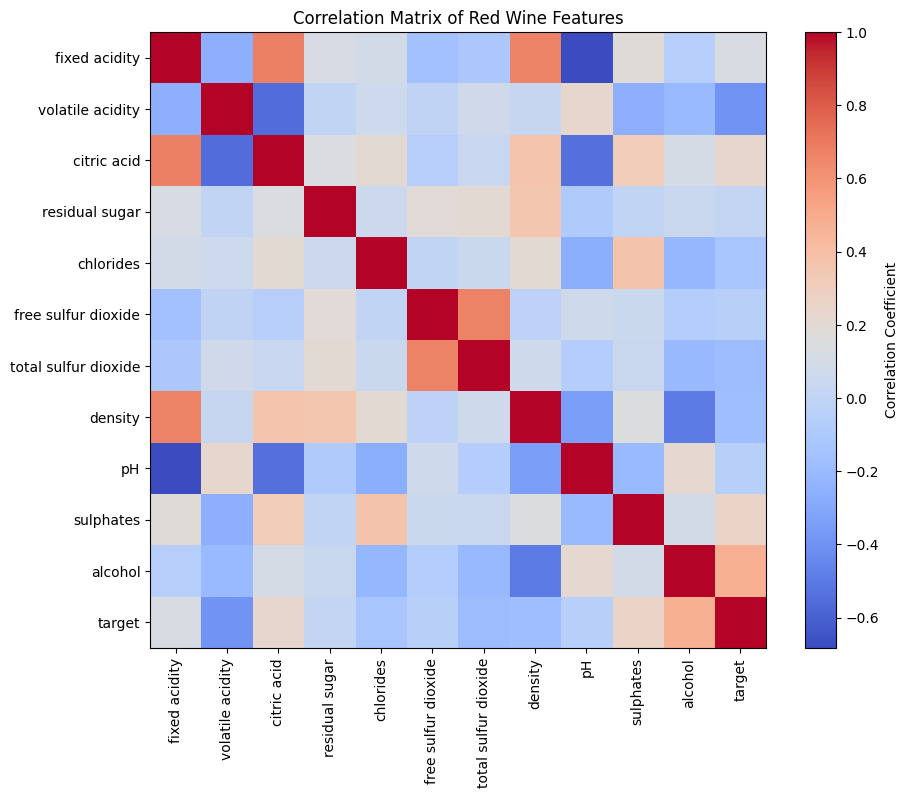

In [15]:
# YOUR CODE HERE
#Calculate correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix of Red Wine Features")
plt.show()

Calculate correlation matrix

In [16]:
abs_corr = corr_matrix.abs()
np.fill_diagonal(abs_corr.values, 0)
max_corr_val = abs_corr.max().max()
max_pair = abs_corr.stack().idxmax()
print(f"Highest correlation pair: {max_pair}")
print(f"Correlation value: {max_corr_val:.4f}")


Highest correlation pair: ('fixed acidity', 'pH')
Correlation value: 0.6830


real value

In [17]:
real_corr = df[max_pair[0]].corr(df[max_pair[1]])
print(f"Actual Correlation: {real_corr:.4f}")

Actual Correlation: -0.6830


YOUR ANSWERS HERE

The pair of different columns highlighted as the most correlated is fixed acidity and pH.

They have a correlation of approximately -0.683. This is a strong negative correlation, which makes chemical sense: as the concentration of fixed acids increases, the pH level (which measures alkalinity) decreases (becomes more acidic).

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [18]:
# YOUR CODE HERE

YOUR ANSWERS HERE

Linear Regression (Ordinary Least Squares)
Sklearn: sklearn.linear_model.LinearRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
Concept: Wikipedia - Linear Regression (https://en.wikipedia.org/wiki/Linear_regression)
Description: A simple model that fits a straight line (or hyperplane) through the data points by minimizing the sum of the squared differences between the observed and predicted values.

Decision Tree Regressor
Sklearn: sklearn.tree.DecisionTreeRegressor (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
Concept: Wikipedia - Decision Tree Learning (https://en.wikipedia.org/wiki/Decision_tree_learning
Description: A non-linear model that splits the data into subsets based on feature values, creating a tree structure. It predicts the target value by taking the average of the leaf node the data point falls into.

K-Nearest Neighbors Regressor (KNN)
Sklearn: sklearn.neighbors.KNeighborsRegressor (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
Concept: Wikipedia - K-nearest neighbors algorithm (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
Description: A non-parametric method that predicts the value of a data point by looking at the 'k' closest training examples in the feature space and averaging their target values.

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [19]:
# YOUR CODE HERE

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df.drop('target', axis=1)
y = df['target']

models = {
"Linear Regression": sklearn.linear_model.LinearRegression(),
"Decision Tree": DecisionTreeRegressor(random_state=42),
"KNN (k=5)": KNeighborsRegressor(n_neighbors=5)
}

results = {}
predictions = {}
for name, model in models.items():
    model.fit(X, y)

    y_pred = model.predict(X)
    predictions[name] = y_pred

l2 = mean_squared_error(y, y_pred)
l1 = mean_absolute_error(y, y_pred)
results[name] = {'L2': l2, 'L1': l1}

--- KNN (k=5) ---
L2 Loss (MSE): 0.3549
L1 Loss (MAE): 0.4408



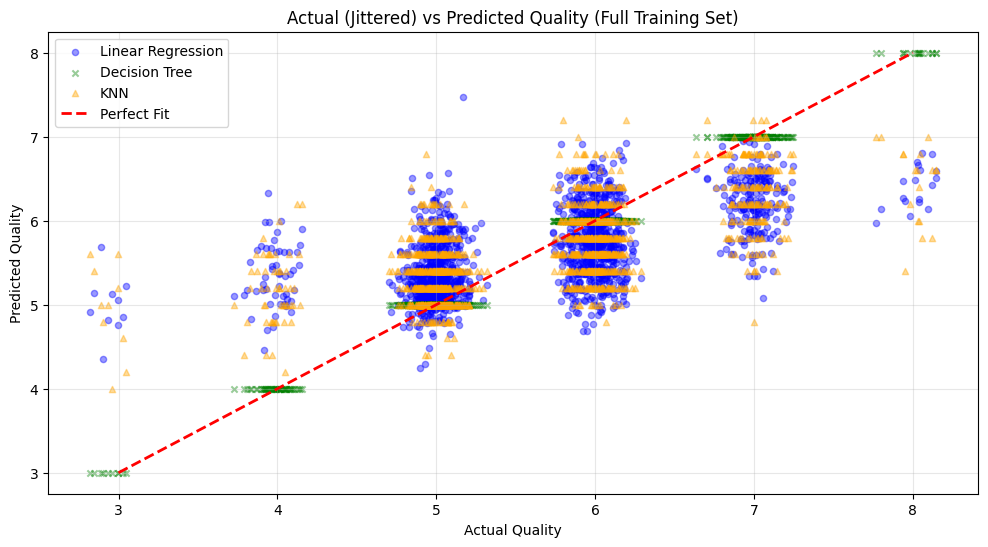

In [20]:
for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"L2 Loss (MSE): {metrics['L2']:.4f}")
    print(f"L1 Loss (MAE): {metrics['L1']:.4f}")
    print("")

plt.figure(figsize=(12, 6))

rng = np.random.default_rng(42)
y_jitter = y + rng.normal(0, 0.1, size=len(y))
plt.scatter(y_jitter, predictions["Linear Regression"], alpha=0.4, label="Linear Regression", color='blue', s=20)
plt.scatter(y_jitter, predictions["Decision Tree"], alpha=0.4, label="Decision Tree", color='green', marker='x', s=20)
plt.scatter(y_jitter, predictions["KNN (k=5)"], alpha=0.4, label="KNN", color='orange', marker='^', s=20)

min_val = min(y.min(), min(predictions["Linear Regression"].min(), predictions["Decision Tree"].min()))
max_val = max(y.max(), max(predictions["Linear Regression"].max(), predictions["Decision Tree"].max()))
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label="Perfect Fit")
plt.title("Actual (Jittered) vs Predicted Quality (Full Training Set)")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE